# Data Exploration and Scikit-Learn

In this final Python lesson, we'll use everything we've learned so far and work with some real datasets. We'll also finally use the Scikit-Learn library (called `sklearn` in Python) to do some basic machine learning on some sample data.

## Some important imports

In Jupyter Notebooks, we can import the libraries we need once, and then use the libraries on all future code blocks without needing to re-import everything. 

Run the following code block:

In [1]:
%matplotlib inline
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt

## Get that dataset!

Before we can start to do machine learning, we need to have data to train our systems on. If you remember in the "Introduction to Machine Learning" lesson, datasets aren't always easy to come by, and many are privately collected and owned. Very often, if you want to work on a new machine learning application, you may have to figure out how to collect your own data.

However, there are many great services that have open and free datasets that you can use, like [Kaggle](https://www.kaggle.com/). For this lesson, we'll use a dataset from Kaggle that contains Spotify information on the top songs of 2017.

## Grabbing datasets from GitHub

We've actually stored the dataset in a different website, called [GitHub](https://github.com/), so that we can easily grab the data for this lesson.

Be sure to run each of the code blocks below. They're not written in Python -- they're written in a different language called Bash, which is typically used on the command line and can manipulate things like files on your computer.

You don't have to worry about what each of these code blocks does, just that they help us pull data from GitHub so that we have access to it within this Notebook. (Almost like how we need to import libraries before we can start to use them.)

In [2]:
# The following is not a Python command, but a bash command
# It looks at the files and folders in this current directory
! ls

L1_Rule_based_classifier.ipynb
L1_Rule_based_classifier_Solutions.ipynb
L2_Evaluation.ipynb
L2_Evaluation_Solutions.ipynb
L3_Naive_Bayes.ipynb
L3_Naive_Bayes_Solutions.ipynb
L5_Clustering.ipynb
L5_Clustering_Solutions.ipynb
L6_Linear_Regression.ipynb
L6_Linear_Regression_Solutions.ipynb
L7_Classification.ipynb
L7_Classification_Solutions.ipynb
P3_Functions_Numpy_Matplotlib.ipynb
P3_Functions_Numpy_Matplotlib_Solutions.ipynb
P4_Data_Exploration_and_Scikit_Learn_Basics.ipynb
house_prices_train.csv
lib


In [3]:
# This checks if the directory called "random-data" exists, and if so, remove it
! if [ -d "random-data" ]; then rm -r random-data; fi
! ls

L1_Rule_based_classifier.ipynb
L1_Rule_based_classifier_Solutions.ipynb
L2_Evaluation.ipynb
L2_Evaluation_Solutions.ipynb
L3_Naive_Bayes.ipynb
L3_Naive_Bayes_Solutions.ipynb
L5_Clustering.ipynb
L5_Clustering_Solutions.ipynb
L6_Linear_Regression.ipynb
L6_Linear_Regression_Solutions.ipynb
L7_Classification.ipynb
L7_Classification_Solutions.ipynb
P3_Functions_Numpy_Matplotlib.ipynb
P3_Functions_Numpy_Matplotlib_Solutions.ipynb
P4_Data_Exploration_and_Scikit_Learn_Basics.ipynb
house_prices_train.csv
lib


In [4]:
# This creates a new directory based on a repo from my GitHub
! git clone https://github.com/Devking/random-data.git

Cloning into 'random-data'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Receiving objects: 100% (19/19), 102.20 KiB | 752.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [5]:
# This is for us to check that the directory was successfully downloaded
! ls

L1_Rule_based_classifier.ipynb
L1_Rule_based_classifier_Solutions.ipynb
L2_Evaluation.ipynb
L2_Evaluation_Solutions.ipynb
L3_Naive_Bayes.ipynb
L3_Naive_Bayes_Solutions.ipynb
L5_Clustering.ipynb
L5_Clustering_Solutions.ipynb
L6_Linear_Regression.ipynb
L6_Linear_Regression_Solutions.ipynb
L7_Classification.ipynb
L7_Classification_Solutions.ipynb
P3_Functions_Numpy_Matplotlib.ipynb
P3_Functions_Numpy_Matplotlib_Solutions.ipynb
P4_Data_Exploration_and_Scikit_Learn_Basics.ipynb
house_prices_train.csv
lib
random-data


# Spotify's Top Songs of 2017

Let's say that you were interested in music and wanted to create a machine learning system to suggest a new song for someone to listen to. How would we create this?

Well first, we would need to have some data on what music people like. Once we have that data, we might start to think about the different qualities of a song, so you can recommend new songs based on similar qualities from songs a person has listened to.

The Spotify Top Songs of 2017 dataset contains exactly that information, so let's see how we would start to use it.

## Working with Pandas

Before we jump into machine learning, let's practice looking at datasets and exploring them. We'll use a library called `pandas` to help us do this.

We've already imported `pandas` earlier in the Notebook, so we can use it in the following code blocks. If you did not run the first code block of this lesson, the following code will raise an error.

In [6]:
# This is the file name of the Spotify dataset
# It's a "CSV" file, which stands for "comma-separated values file"
# Really, it's just a long text file with a lot of information separated by commas
filename = "random-data/spotify.csv"

# We will use a function built into pandas to read our csv data
data = pandas.read_csv(filename)

# Finally, we'll print the data to take a look at it
print(data)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

The print-out of our data above looks... not too informative. This is mainly because there's a lot of data in our dataset that we're working with, and Jupyter Notebooks doesn't format it nicely for us when we directly print all of the data. Instead, we'll have to use some functions in `pandas` to explore the data ourselves.

By the way, if you want to see the data in this dataset as a table, you can [click here to see it displayed in GitHub](https://github.com/Devking/random-data/blob/master/spotify.csv). We'll also write some code so that we can visualize our data in table form.

There are 2017 rows in this dataset and 17 columns, where each row is a single song and (almost) each column is a **feature** of the song. In terms of dataset size, this is closer to the small side -- some datasets may have thousands or even millions of rows.

## Exploring some features

Recall that our data in datasets is described by a set of properties called features.

For song data, some features you might expect are tempo, time signature, and name.

Let's print all of the names of the songs:

In [7]:
# Notice that we didn't just say "name"
# Like with accessing values in dictionaries, the specific key value in this data set is "song_title"
print(data["song_title"])

0                                   Mask Off
1                                    Redbone
2                               Xanny Family
3                             Master Of None
4                             Parallel Lines
                        ...                 
2012     Like A Bitch - Kill The Noise Remix
2013                                   Candy
2014    Habit - Dack Janiels & Wenzday Remix
2015                           First Contact
2016                      I Wanna Get Better
Name: song_title, Length: 2017, dtype: object


The above code prints the song titles for all 2017 songs in our dataset. However, if we wanted to recommend a new song to someone, it probably wouldn't be enough to just recommend them based on song title. We'll want to make use of multiple features, and it may help us to visualize them to find patterns in the data.

How do we know what all of the features in our dataset are? One way is to look directly at the CSV file, because these are usually the column headers that are on the first line of the file. (We could also look at the column headings in GitHub since it displays all of the data in a table nicely for us.) Since we're trying to work with our Python code as much as possible, let's see how we would do it in Python:

In [8]:
filename = "random-data/spotify.csv"
raw_data = pandas.read_csv(filename)

# Get the values of the columns (the features) and print them out
features = raw_data.columns.values
print(features)

['Unnamed: 0' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'key' 'liveness' 'loudness' 'mode' 'speechiness'
 'tempo' 'time_signature' 'valence' 'target' 'song_title' 'artist']


We see from the printout different features of our songs, such as tempo, acoustiness (how many acoustic sounds, like an acoustic guitar, are in a song), title, and artist. The first column is actually used to index the songs (so we can refer to them by number), and that's why the column title shows as "Unnamed: 0". This particular column is not a feature of our data.

For now, let's work with just a small amount of our dataset -- four features (tempo, acousticness, song title, and artist) and 20 songs.

In [9]:
filename = "random-data/spotify.csv"
raw_data = pandas.read_csv(filename)

# In pandas, we put our data into data frames so that we can manipulate them
# This takes two parameters: raw_data specifies that we're using the music data from above
# columns specifies what columns of that data we want to keep
data = pandas.DataFrame(raw_data, columns=['tempo', 'acousticness', 'song_title', 'artist'])

# Remember slicing? We use that to take just the first 20 songs in our dataset
data = data[:20]

# This will display our data in a nice table
# Typically we need to use print(), but our variable 'data' is a pandas DataFrame which has special display properties
data

,tempo,acousticness,song_title,artist
0,150.062,0.01020,Mask Off,Future
1,160.083,0.19900,Redbone,Childish Gambino
2,75.044,0.03440,Xanny Family,Future
3,86.468,0.60400,Master Of None,Beach House
4,174.004,0.18000,Parallel Lines,Junior Boys
5,85.023,0.00479,Sneakin’,Drake
6,80.030,0.01450,Childs Play,Drake
7,144.154,0.02020,Gyöngyhajú lány,Omega
8,130.035,0.04810,I've Seen Footage,Death Grips
9,99.994,0.00208,Digital Animal,Honey Claws


There! Now we have something that's much more manageable.

## Comparing features of songs

Say we know someone likes the song "Mask Off" by Future, and we want to recommend them another song based off of similarity to "Mask Off".

Perhaps we think that the tempo (or speed) of the song might be helpful, so we'll look for songs that are similar in tempo to "Mask Off" (which is tempo = 150.062 beats per minute).

In [10]:
# Let's keep track of the Mask Off tempo
mask_off_tempo = 150.062

# Let's create a new column in our dataset
# The value of this column is the difference in tempo from that song and the tempo of "Mask Off"
# The function abs() takes the absolute value, because we just need to know the difference in tempo,
# but not if that tempo is faster or slower than "Mask Off"
data['tempo_difference'] = abs(mask_off_tempo - data.tempo)
data

,tempo,acousticness,song_title,artist,tempo_difference
0,150.062,0.01020,Mask Off,Future,0.000
1,160.083,0.19900,Redbone,Childish Gambino,10.021
2,75.044,0.03440,Xanny Family,Future,75.018
3,86.468,0.60400,Master Of None,Beach House,63.594
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942
5,85.023,0.00479,Sneakin’,Drake,65.039
6,80.030,0.01450,Childs Play,Drake,70.032
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027
9,99.994,0.00208,Digital Animal,Honey Claws,50.068


### Visualizing the tempo difference

We can look at the column `tempo_difference` in our table above to see which songs have similar tempos to "Mask Off". Another way to present this information is to visualize it in a graph:

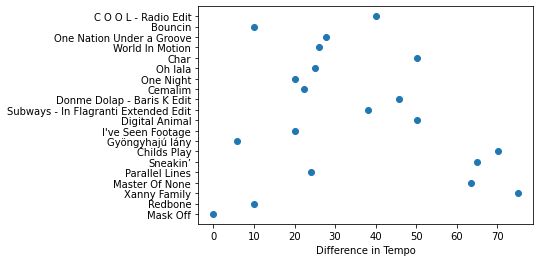

In [11]:
# Remember that we've imported matplotlib.pyplot as plt at the start of the Notebook
# Here we will use pyplot to do our visualization

plt.scatter(data['tempo_difference'], data['song_title'])
plt.xlabel('Difference in Tempo')
plt.show()

Take a moment to look at the graph and see what's going on. The y-axis of the graph is _discrete_ -- each y-value refers to a specific song. The x-axis of the graph is the tempo difference. 

Points that are closer to the left have smaller differences in tempo, whereas points that are closer to the right have larger differences in tempo.

Looking at the graph above, which song has the largest difference in tempo from "Mask Off"?

### Finding the acousticness difference

Let's do the same for acousticness, which we might think is another good measure of song similarity.

The acousticness of a song is measured from 0 to 1, with 0 being no acousticness (all electronic sounds) and 1 being all acoustic (imagine an acoustic guitar on its own). The acoustiness of "Mask Off" is 0.01020.

In [12]:
# Add new column for acoustic difference
data['acoustic_difference'] = abs(0.01020 - data.acousticness)
data

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference
0,150.062,0.01020,Mask Off,Future,0.000,0.00000
1,160.083,0.19900,Redbone,Childish Gambino,10.021,0.18880
2,75.044,0.03440,Xanny Family,Future,75.018,0.02420
3,86.468,0.60400,Master Of None,Beach House,63.594,0.59380
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942,0.16980
5,85.023,0.00479,Sneakin’,Drake,65.039,0.00541
6,80.030,0.01450,Childs Play,Drake,70.032,0.00430
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908,0.01000
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027,0.03790
9,99.994,0.00208,Digital Animal,Honey Claws,50.068,0.00812


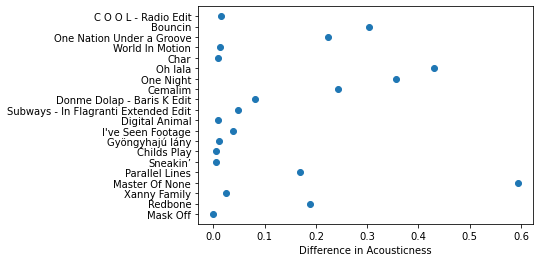

In [13]:
# Visualize it

plt.scatter(data['acoustic_difference'], data['song_title'])
plt.xlabel('Difference in Acousticness')
plt.show()

What song is most different in acousticness to "Mask Off"?

## Recommendation based on similarity

Now we want to recommend a song based on its similarity to "Mask Off", in terms of both tempo and acousticness. Looking at the two graphs above, which song might you say is closest to "Mask Off" for both features?

Take a moment to look at both graphs and try to decide!



---

One possible recommendation is the song "Gyöngyhajú lány", which is similar in both tempo and acousticness. Let's listen to a bit of the two songs to see if we think that's accurate:

> Future - Mask Off (Clean): https://www.youtube.com/watch?v=5G2SjYMy7gk

> Omega - Gyöngyhajú lány: https://www.youtube.com/watch?v=CGt-rTDkMcM&feature=youtu.be

Though they sound very different from one another, you can indeed say that the features like tempo are similar. However, upon listening to the songs themselves, you might come to the conclusion that they don't _really_ sound similar. Perhaps other features of songs, like genre, may be better features to recommend off of. It's an open question! 

Part of the work when developing a recommendation system like this is to see which features give better recommendations, and to select what the best features might be. We might know that "Mask Off" and "Gyöngyhajú lány" are similar songs in terms of tempo and acoustiness, but this might not mean that they're similar with regards to other features.

### Quantifying similarity with multiple features

Before we move on to using Scikit-Learn, let's try to quantify the similarity between songs using both tempo and acousticness together. Previously, we had calculated the tempo difference and the acousticness difference separately, and can compare songs based on one feature or the other. 

When we tried to find the most similar song using both features, we mainly approached it by visually inspecting the two graphs.

But how can we calculate similarity with respect to both features, in a quantifiable way?

First, let's see if we can visualize our 20 songs on the same graph, with both tempo and acoustiness features represented:

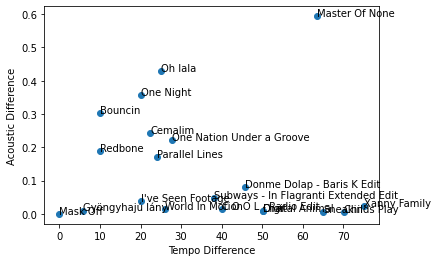

In [14]:
# The x-axis is tempo
# The y-axis is acousticness
plt.scatter(data['tempo_difference'], data['acoustic_difference'])
plt.xlabel('Tempo Difference')
plt.ylabel('Acoustic Difference')

# Set the figure size of the plot so it's not too small to read
plt.rcParams["figure.figsize"] = 10,10

# This loop goes through each point on the graph and labels it with the song title
for index, row in data.iterrows():
    plt.annotate(row['song_title'], xy=(row['tempo_difference'], row['acoustic_difference']))

From this visualization, where we look at both features at once, it's a lot clearer that "Gyöngyhajú lány" is very similar to "Mask Off" in terms of both acousticness and tempo difference, whereas "Master of None" is very different.

Interesting aside: While "Mask Off" was released in the year 2017, "Master of None" was released in 2007, but happened to regain popularity in 2017. This is likely because of its use in the Netflix show, "Master of None". While a data scientist may look at data in terms of the numbers, a social scientist (like a sociologist or cultural anthropologist) can give context to the data that we're looking at. When creating applications for the real world, we need this sort of context, and it may help us understand how to make better software like recommendation systems. For example, a music expert might be able to provide context that similarity in genre is a better feature to use for recommending a song, rather than similarity in tempo. Working across disciplines and bringing in perspectives from the arts and humanities helps us create better computer programs!



---

On the visualization above, we might realize that we can quantify 'similarity' as the distance between two points. The shorter the distance from "Mask Off", the more similar the song represented by that point is. We can make use of this intuition to numerically compute similarity across both features.

How do we compute distance again? We use the distance formula!

$$ distance = \sqrt{(y_2 - y_1)^{2} + (x_2 - x_1)^{2}} $$

In words, we take the squared difference of both features, add them, and then take the square root.

Let's say $ (x_2, y_2) $ is our point representing "Mask Off", which is at $(0,0)$. To find the distance to the point representing "Gyöngyhajú lány", we substitute for $x_1$ and $y_1$ the values of "Gyöngyhajú lány", which are 5.908 and 0.01000.

Written out:

$$ distance = \sqrt{(0.01 - 0)^{2} + (5.908 - 0)^{2}} $$
$$ distance = 5.908 $$ 

We can write this out in code and create a new column based on "distance" from "Mask Off":

In [15]:
mask_off_tempo = 150.062
mask_off_acousticness = 0.0102
data["distance"] = np.sqrt((data.acousticness - mask_off_acousticness) ** 2 + (data.tempo - mask_off_tempo) ** 2)

# Let's sort the dataset in terms of distance
sorted_dataset_distance = data.sort_values('distance')

sorted_dataset_distance

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference,distance
0,150.062,0.01020,Mask Off,Future,0.000,0.00000,0.000000
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908,0.01000,5.908008
18,140.061,0.31400,Bouncin,Chief Keef,10.001,0.30380,10.005613
1,160.083,0.19900,Redbone,Childish Gambino,10.021,0.18880,10.022778
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027,0.03790,20.027036
13,130.007,0.36600,One Night,Lil Yachty,20.055,0.35580,20.058156
12,127.681,0.25300,Cemalim,Erkin Koray,22.381,0.24280,22.382317
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942,0.16980,23.942602
14,125.011,0.44000,Oh lala,PNL,25.051,0.42980,25.054687
16,123.922,0.02390,World In Motion,New Order,26.140,0.01370,26.140004


Now we have a column that tells us numerically which song is closest to "Mask Off" in terms of both tempo and acousticness!

### Normalizing our data

But wait a minute... if we take a close look at the `tempo_difference` and `distance` columns, we will notice that the two are very similar. This makes sense, because while tempo values range anywhere from 0 to 161 in our dataset, acousticness only goes from 0 to 1. The `tempo_difference` completely overshadows the `acoustic_difference` when we calculate `distance`.

In data science and machine learning, it's very common for different features to work on completely different scales. This means that we cannot compare two features directly against one another, without first **normalizing** the data to the same scale across all features. Typically, normalizing our data means scaling the values of our features to a range between 0 and 1.

We won't cover normalizing in this lesson, but it's good to be aware that this is a typical process that we perform on our data before using it to train a machine learning system.